# Linear Regression
- [文档描述](http://note.youdao.com/noteshare?id=e3d052b17e33e6a1d9c45b7f8a90d86c)
- [概率解释](http://note.youdao.com/noteshare?id=7fed273c48f9cae6c2de5155755fe1c4)
- [其他代码实现](http://note.youdao.com/noteshare?id=8e351d3f674c47465a7a6b181578f942)
## Implementation mainly using numpy
- [关键参考代码](https://github.com/Sierkinhane/CS229-ML-Implements/blob/master/00-SupervisedLearning/01-LinearRegression/00-LinearRegression.py)

In [1]:
# author:kindlytree      
# torch.nn.Linear(m, n) m,n是指维度  
# [m,n] is model's weight shape  
# n is m bias's shape   
# we use sklearn dataset package to generate train data


In [2]:
# original method, use numpy to implement
%matplotlib inline
from sklearn import datasets
from sklearn.model_selection import train_test_split
from matplotlib import pyplot as plt
import numpy as np
import time

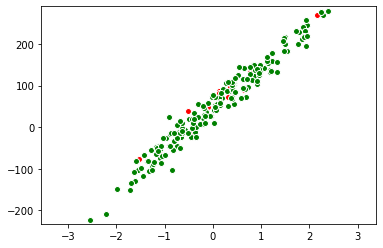

Coeff=96.19363785472291


In [3]:
# make dummy regression data
# sklearn.datasets.make_regression https://blog.csdn.net/WWWWWWGJ/article/details/87903994
# random_state : int, RandomState instance or None (default)
# Determines random number generation for dataset creation. Pass an int for reproducible output across 
# multiple function calls
# n_targets : int, optional (default=1)
# The number of regression targets, i.e., the dimension of the y output vector associated with a sample. 
# By default, the output is a scalar.
# n_features : int, optional (default=100) 特征数
X, Y, Coef = datasets.make_regression(n_samples=200, n_features=1, noise=20, random_state=0, bias=50,coef=True)
# test_size：如果是浮点数，在0-1之间，表示样本占比；如果是整数的话就是样本的数量
X_train,X_test,Y_train,Y_test = train_test_split(X,Y,test_size=0.1, random_state=0)
# y = \theta^TX, X_0=1, \theta _0 = bias
X0_train = np.ones([X_train.shape[0],1],dtype=X_train.dtype)
X0_test = np.ones([X_test.shape[0],1], dtype=X_test.dtype)
X_train = np.concatenate((X0_train,X_train), axis=1)
X_test = np.concatenate((X0_test, X_test), axis=1)

# show data
plt.scatter(X_test[:,1], Y_test, c='red', edgecolors='white')
plt.scatter(X_train[:,1], Y_train, c='green', edgecolors='white')
plt.ylim((Y.min()-10, Y.max()+10))
plt.xlim((X.min()-1, X.max()+1))
plt.show()
print('Coef={}'.format(Coef))

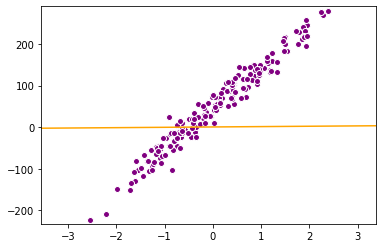

In [ ]:
import matplotlib.animation as animation
import copy

#learnable parameter theta
THETA = np.zeros([2,1], dtype=np.float32)
# learning rate
lr = 0.02
epoch = 3

#plt.ion()
thetas = []
p_x = np.linspace(X.min()-1, X.max()+1, 50)
fig = plt.figure()
plt.ylim((Y.min()-10, Y.max()+10))
plt.xlim((X.min()-1, X.max()+1))
plt.scatter(X_train[:,1], Y_train, c='purple', marker='o', edgecolors='white')
ln, = plt.plot(p_x, THETA[1,0]*p_x+THETA[0,0], c='orange')
# numpy中的乘法
#　元素相乘:multply()
#　矩阵相乘:dot()、matmul()、’@’
#　’*': 是特别的。在数组操作中，作为元素相乘；在矩阵操作中作为矩阵相乘。
def h(theta, X):
    h_x = np.matmul(theta.T,X)
    return h_x
def loss_function(theta, X, Y):
    cost = 1/2*np.matmul((h(theta,X)-Y.T),(h(X,theta)-Y.T).T)
    return cost/(X.shape[0])

# child matrix trick using mulitiply functions
def gradient(theta,X, Y):
    gradient = np.multiply(X.T,(h(theta,X)-Y.T).T)
    return gradient.mean(axis=0).T

def update_parameters(theta, gradient, lr):
    theta = theta-lr*gradient
    return theta


def update(frame):
    #xdata.append(frame)
    #ydata.append(np.sin(frame))
    Y = frame[1,0]*p_x+frame[0,0]
    ln.set_data(p_x, Y)
    return ln,



for ep in range(epoch):
    for index in range(X_train.shape[0]//2):
        batch_X = X_train[index*2:(index+1)*2,:].T # 2*2 matrix
        batch_Y = Y_train[index*2:(index+1)*2].reshape([2,1])# 2*1 matrix
        h_X = h(THETA, batch_X) # 1*2 matrix
        #import IPython
        #IPython.embed(colors="Linux")
        loss = loss_function(THETA, batch_X, batch_Y)
        g = gradient(THETA, batch_X, batch_Y)
        g = g.reshape([2,1])
        THETA = update_parameters(THETA, g, lr)
        #print("[{0}/{1}, Stpes:{2}, loss: {3}, Weight: {4}, Bias:{5}]".format( \
        #           ep+1, epoch, index+1, loss[0][0],THETA[1,0],THETA[0,0]))
        theta = copy.deepcopy(THETA)
        thetas.append(theta)
        #plt.cla()
        #plt.scatter(X_train[:,1], Y_train, c='purple', marker='o', edgecolors='white')
        #plt.plot(p_x, THETA[1,0]*p_x+THETA[0,0], c='orange')
        #plt.pause(0.01)
        # ims.append(im)
#plt.ioff()
anim = animation.FuncAnimation(fig, update,frames=thetas,interval=30, blit=True)
plt.show()
anim.save("sgd_linear_regression.gif",writer='pillow')
# ani = animation.ArtistAnimation(fig, ims, interval=200, repeat_delay=1000)
# ani.save("sgd_linear_regression.gif",writer='pillow')
        

![动画显示](sgd_linear_regression.gif)